In [1]:
import hddm
import pandas as pd
import matplotlib.pyplot as plt
!cd /Users/Krista/Documents/github_repositories/testing-master

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [6]:
data = hddm.load_csv('./1000t.csv')
data.columns = data.columns.str.strip()
data.head(4)
data.tail(4)
data.describe()

,rt,response,subj_idx
count,200000.000000,200000.000000,200000.000000
mean,0.324021,0.519975,24.500000
std,0.147910,0.499602,14.430906
min,0.002000,0.000000,0.000000
25%,0.232000,0.000000,12.000000
50%,0.282000,1.000000,24.500000
75%,0.352000,1.000000,37.000000
max,0.700000,1.000000,49.000000


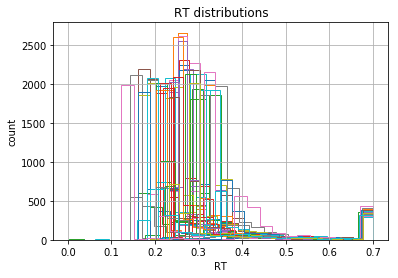

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [9]:
comb_stim = hddm.HDDM(data, depends_on={'v': 'cond', 'a': 'cond'})
comb_stim.find_starting_values()
comb_stim.sample(100, burn=100)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------101%-----------------] 101 of 100 complete in 86.8 secCould not generate output statistics for v_subj(hc).46
Could not generate output statistics for v_subj(hc).48
Could not generate output statistics for t_subj.0
Could not generate output statistics for t_subj.4
Could not generate output statistics for t_subj.1
Could not generate output statistics for v_subj(hc).49
Could not generate output statistics for v_subj(hc).47
Could not generate output statistics for t_subj.7
Could not generate output statistics for v_subj(hv).8
Could not generate output statistics for t_subj.14
Could not generate output statistics for v_subj(hv).15
Could not generate output statistics for t_subj.38
Could not generate output statistics for t_subj.49
Could not generate output statistics for t_subj.20
Could not generate output statistics for t_subj.22
Could not generate output statistics for v_subj(hv).16
Could not generate output statistics for t_subj.17
Could not generate output statistics 

TypeError: 'NoneType' object is not subscriptable

In [ ]:
drift_stim = hddm.HDDM(data, depends_on={'v': 'cond'})
drift_stim.find_starting_values()
drift_stim.sample(100, burn=100)

In [ ]:
bound_stim = hddm.HDDM(data, depends_on={'a': 'cond'})
bound_stim.find_starting_values()
bound_stim.sample(100, burn=100)

In [ ]:
stats = comb_stim.gen_stats()
v = stats[stats.index.isin(['v(hc)','v(lc)', 'v(hv)','v(lv)'])]
v

In [ ]:
a = stats[stats.index.isin(['a(hc)','a(lc)', 'a(hv)','a(lv)'])]
a

In [ ]:
m_stim.plot_posteriors('a', 'v')

In [ ]:
v_lc, v_hc = m_stim.nodes_db.node[['v(lc)', 'v(hc)']]
v_lv, v_hv = m_stim.nodes_db.node[['v(lv)', 'v(hv)']]
a_lv, a_hv = m_stim.nodes_db.node[['a(lv)', 'a(hv)']]
a_lc, a_hc = m_stim.nodes_db.node[['a(lc)', 'a(hc)']]

In [ ]:
hddm.analyze.plot_posterior_nodes([v_lc, v_hc])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('1000t: Posterior of drift-rate group means')
plt.savefig('1000t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv, v_hv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('1000t: Posterior of drift-rate group means')
plt.savefig('1000t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([a_lc, a_hc])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('1000t: Posterior of decision boundary group means')
plt.savefig('1000t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([a_lv, a_hv])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('1000t: Posterior of decision boundary group means')
plt.savefig('1000t_bound_vol.pdf')


In [ ]:
# print("P(low_conflict_drift > high_conflict_drift) = ", (v_hc.trace() > v_lc.trace()).mean())
# print("P(low_conflict_bound > high_conflict_bound) = ", (a_hc.trace() > a_lc.trace()).mean())
# print("P(high_volatility_bound > low_volatility_bound) = ", (a_hv.trace() > a_lv.trace()).mean())
# print("P(high_volatility_drift > low_volatility_drift) = ", (v_hv.trace() > v_lv.trace()).mean())

In [ ]:
#for when i fit a null model 
print("Stimulus model DIC: %f" % m_stim.dic)

In [ ]:
#model does not save... db is 'ram' error
# m_stim.save('1000t')

In [ ]:
 m_stim.print_stats('./1000t_stats.csv')